Informática - 1º de Física - UMU
<br>
**Computación Científica**
<br>
<p style="color:#808080"> <small><small>
28/11/2018
</small></small></p>

## Análisis de datos

En este capítulo mostraremos varios ejemplos de manipulación de datos usando `numpy` y `pandas`. No es necesario aprender nada de memoria. Lo importante es entender el tipo de procesos que podemos hacer usando estas herramientas y tener a mano una colección de ejemplos típicos para adaptarlos a nuestras necesidades.

### Módulos necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Números pseudoaleatorios y estadística elemental

Simulamos el lanzamiendo de 1000 dados. Queremos comprobar que los 6 resultados son igualmente probables.

In [2]:
dados = np.random.randint(1,6+1,1000)

In [3]:
dados

array([4, 3, 6, 1, 1, 1, 2, 3, 4, 2, 6, 4, 4, 5, 1, 6, 2, 3, 6, 5, 1, 3,
       3, 2, 2, 6, 5, 5, 6, 1, 2, 1, 6, 4, 3, 2, 3, 6, 2, 4, 2, 1, 6, 2,
       3, 1, 6, 3, 2, 4, 4, 4, 5, 5, 3, 6, 5, 5, 6, 6, 2, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 3, 6, 1, 3, 3, 1, 1, 5, 4, 3, 2, 4, 1, 3, 4, 1, 2, 3,
       6, 1, 4, 6, 2, 4, 4, 6, 6, 5, 4, 1, 3, 6, 5, 3, 1, 2, 5, 2, 3, 6,
       6, 1, 4, 1, 1, 4, 2, 3, 6, 6, 1, 2, 6, 6, 3, 5, 4, 3, 6, 3, 5, 1,
       5, 6, 2, 3, 4, 6, 4, 4, 1, 6, 5, 1, 1, 6, 3, 4, 6, 6, 2, 6, 5, 4,
       6, 6, 5, 6, 4, 2, 1, 6, 5, 5, 6, 3, 5, 3, 3, 4, 3, 4, 1, 2, 1, 2,
       6, 6, 3, 4, 4, 6, 3, 3, 3, 3, 1, 3, 6, 5, 1, 2, 3, 6, 2, 2, 5, 5,
       3, 4, 3, 2, 2, 5, 1, 1, 5, 6, 2, 3, 2, 1, 3, 6, 6, 2, 1, 1, 1, 1,
       3, 5, 2, 1, 3, 5, 4, 5, 4, 2, 3, 3, 4, 5, 6, 1, 4, 1, 6, 4, 5, 1,
       3, 4, 5, 2, 3, 1, 3, 5, 4, 6, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1, 2, 1,
       6, 1, 3, 3, 1, 4, 5, 1, 1, 1, 3, 1, 4, 4, 3, 5, 3, 1, 1, 3, 6, 6,
       2, 4, 1, 1, 2, 3, 4, 2, 2, 6, 2, 4, 5, 5, 4,

El histograma de resultados debe mostrar una distribución aproximadamente uniforme.

(array([188.,   0., 171.,   0., 148.,   0., 155.,   0., 161., 177.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

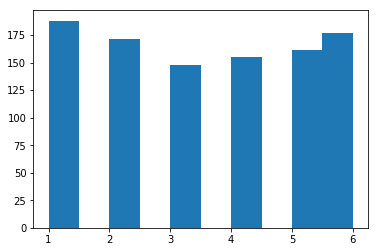

In [4]:
plt.hist(dados)

Las opciones por omisión no son adecuadas para este problema, quedan cajas vacías. Normalmente es conveniente especificar los extremos de las cajas ("bins"), para que el histograma quede mejor:

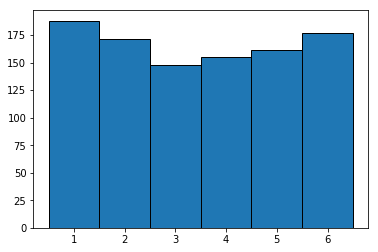

In [5]:
plt.hist(dados,bins=np.arange(0.5,7),edgecolor='black');

Simulemos ahora 100 lanzamientos de 3 dados. Para ello generamos una matriz $100 \times 3$  de enteros pseudoaleatorios entre 1 y 6.

In [6]:
dados = np.random.randint(1,6+1,(100,3))
dados[:10]

array([[5, 4, 6],
       [3, 3, 6],
       [2, 2, 1],
       [2, 3, 6],
       [5, 2, 4],
       [1, 4, 2],
       [1, 1, 2],
       [1, 4, 2],
       [3, 4, 6],
       [4, 3, 3]])

Para calcular la puntuación total en cada tirada sumamos los elementos de la matriz a lo largo de las filas:

In [7]:
s = np.sum(dados,axis=1)
s

array([15, 12,  5, 11, 11,  7,  4,  7, 13, 10, 10, 11, 14,  5,  7, 12,  9,
        6,  6,  9,  9, 13, 10,  7,  9,  6,  6,  9,  6, 13, 12, 10, 13, 11,
       11, 10, 10,  9,  8,  7,  9, 11,  6,  9, 18,  7,  5, 13, 16,  9, 13,
        9, 15, 12,  9, 14,  5,  8, 10, 13,  5, 12,  5, 15, 12, 10, 14, 11,
       13,  6, 14,  9,  9, 13,  6, 10,  4, 13, 11, 12, 15, 10,  8,  5, 11,
       12,  7,  5,  9, 12,  7, 11, 13, 13, 12, 11,  7, 17, 11, 12])

El histograma de resultados ya no es uniforme, empieza a parecerse a una normal.

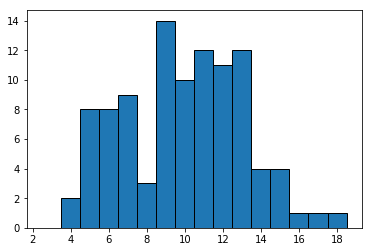

In [8]:
plt.hist(s,bins=np.arange(2.5,19), edgecolor='black');

La distribución acumulada empírica es otra forma de ver el tipo de aleatoriedad de unos datos. Se consigue simplemente ordenando la muestra.

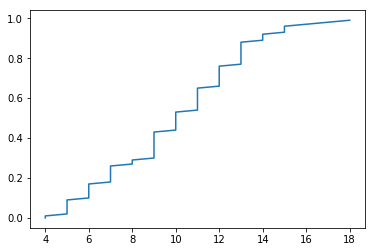

In [9]:
plt.plot(sorted(s),np.arange(len(s))/len(s));

Generemos ahora 100 números pseudo-aleatorios normalmente distribuidos con media 2 y desviación típica 3.

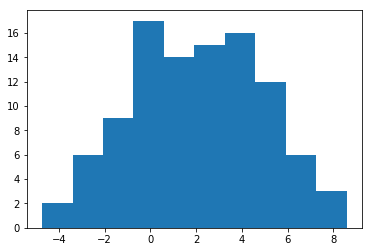

In [10]:
r = 2+3*np.random.randn(100)

plt.hist(r,10);

Podemos compararar el histograma y distribución acumulada empírica de estos datos con la densidad y la distribución acumulada teóricas, que tomamos del módulo `scipy.stats`.

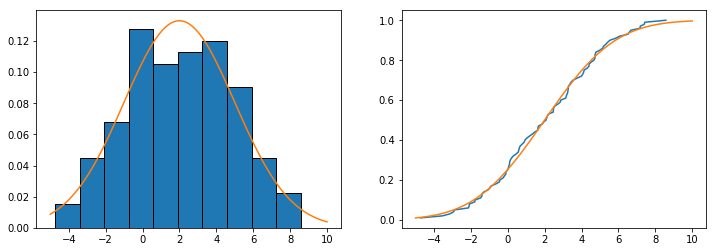

In [11]:
from scipy.stats import norm

x = np.linspace(-5,10,100)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(r,10,density=True,edgecolor='black');
plt.plot(x,norm.pdf(x,2,3));

plt.subplot(1,2,2)
plt.plot(np.sort(r),np.arange(1,101)/100);
plt.plot(x,norm.cdf(x,2,3));

`numpy` proporciona varias funciones estadísticas. Se pueden expresar como propiedades del array o como funciones normales. Elige la forma que más te guste:

In [12]:
r.mean()

2.0481845657756987

In [13]:
np.mean(r)

2.0481845657756987

In [14]:
r.max()

8.573152042696506

In [15]:
min(r)

-4.732006669116478

In [16]:
r.std()

2.828824262402489

In [17]:
np.median(r)

2.0907160157436735

Finalmente, supongamos que queremos saber cómo se transforma una distribución uniforme entre cero y uno con la función $f(x)=x^2$. La densidad de probabilidad resultante se puede obtener de forma analítica, pero también podemos visualizar el resultado fácilmente aplicando la función a una muestra aleatoria.

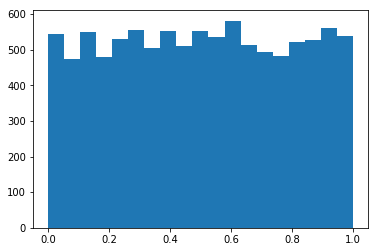

In [18]:
x = np.random.rand(10000)
plt.hist(x,np.linspace(0,1,20));

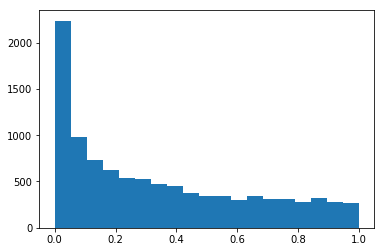

In [19]:
y = x**2
plt.hist(y, np.linspace(0,1,20));

### Lectura desde archivo

El módulo `pandas` proporciona el tipo "dataframe", muy utilizado en análisis de datos. Permite leer conjuntos de datos almacenados en archivos que pueden estar incluso en una máquina remota.

El siguiente archivo contiene datos astronómicos tomados de https://ned.ipac.caltech.edu/.

In [20]:
import pandas as pd

df = pd.read_table('https://robot.inf.um.es/material/data/ConstanteHubbleDatos-1.txt', sep='\s+', comment='#')
df

,V(km/s),Redshift,Magnitud
0,18287,0.060998,17.62
1,5691,0.018983,15.00
2,26382,0.088000,18.59
3,5996,0.020000,15.54
4,19202,0.064051,15.30
5,23684,0.079000,16.56
6,11702,0.039034,17.14
7,17284,0.057653,13.50
8,13491,0.045000,17.80
9,10566,0.035244,15.25


Un experimento interesante es ajustar un modelo lineal a un conjunto de observaciones. Definimos una función auxiliar para dibujar cómo queda una recta cualquiera:

In [21]:
# extraemos las columnas de las variables que nos interesan
x = df.Magnitud.values
y = df['V(km/s)'].values
n = len(x)

# dibuja una recta con coeficientes a,b entre x1 y x2
def abline(a,b,x1,x2):
    x = np.linspace(x1,x2,10)
    plt.plot(x,a*x+b)


def fun(a = 1200, b=0):
    plt.figure(figsize=(6,6))
    plt.plot(x,y,'.',markerSize=10)
    plt.grid(); plt.xlabel('Magnitud'); plt.ylabel('velocity'); 
    plt.title('Redshift data');
    abline(a, b, 0,20)
    plt.axis([11,20,-10000,40000])

Por ejemplo:

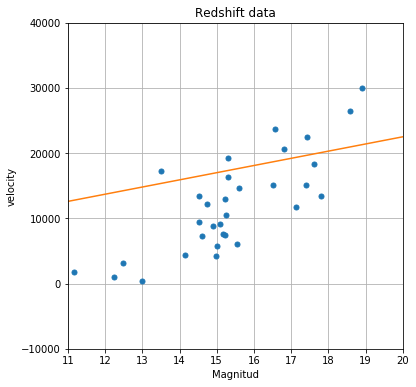

In [22]:
fun(1100,500)

Por supuesto, tiene más sentido encontrar automáticamente la "recta de regresión", que minimiza el error cuadrático. Lo vamos a hacer con el módulo `scikit-learn`.

In [23]:
# conda install scikit-learn

from sklearn import linear_model

/srv/conda/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [24]:
model = linear_model.LinearRegression()
model.fit(x.reshape(n,1),y.reshape(n,1))  # hace falta convertir los vectores en matrices

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model.coef_

array([[3174.16275131]])

In [26]:
model.intercept_

array([-36563.1892937])

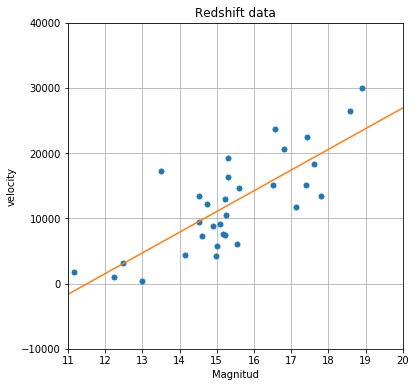

In [27]:
fun(model.coef_[0][0], model.intercept_[0])

Habría que evaluar la calidad del modelo obtenido sobre muestras independientes para ver si tiene sentido usarlo para predecir casos futuros.

### Ciudades

El módulo pandas puede leer hojas de cálculo de Excel. Como ejemplo vamos a hacer unos cuantos experimentos con las ciudades de España.

In [28]:
# conda install xlrd

# https://www.businessintelligence.info/varios/longitud-latitud-pueblos-espana.html

df = pd.read_excel('https://robot.inf.um.es/material/data/listado-longitud-latitud-municipios-espana.xls',skiprows=2)
df.head()

,Comunidad,Provincia,Población,Latitud,Longitud,Altitud,Habitantes,Hombres,Mujeres
0,Andalucía,Almería,Abla,37.14114,-2.780104,871.16840,1504,783,721
1,Andalucía,Almería,Abrucena,37.13305,-2.797098,976.93870,1341,682,659
2,Andalucía,Almería,Adra,36.74807,-3.022522,10.97898,24373,12338,12035
3,Andalucía,Almería,Albánchez,37.28710,-2.181163,481.31230,815,422,393
4,Andalucía,Almería,Alboloduy,37.03319,-2.621750,388.43460,674,334,340


Tenemos un "dataframe" (tabla de datos) con los más de 8000 municipios. Podemos seleccionar los casos (filas) que cumplan una condición, y los atributos deseados (columnas). Finalmente podemos ordenar por cualquier criterio.

In [29]:
df[df.Habitantes > 200000][['Población','Habitantes']].sort_values(by='Habitantes', ascending=False)

,Población,Habitantes
6901,Madrid,3255944
4956,Barcelona,1621537
8094,Valencia,814208
758,Sevilla,703206
1499,Zaragoza,674317
631,Málaga,568305
7032,Murcia,436870
6624,Palma,401270
1595,Palmas de Gran Canaria (Las),381847
7485,Bilbao,354860


Como primer ejemplo vamos a dibujar la posición de las ciudades más grandes.

In [30]:
sel = df[(df.Habitantes > 250000) & (df.Comunidad != 'Canarias')]

x   = sel.Longitud.values
y   = sel.Latitud.values
pob = sel.Población.values

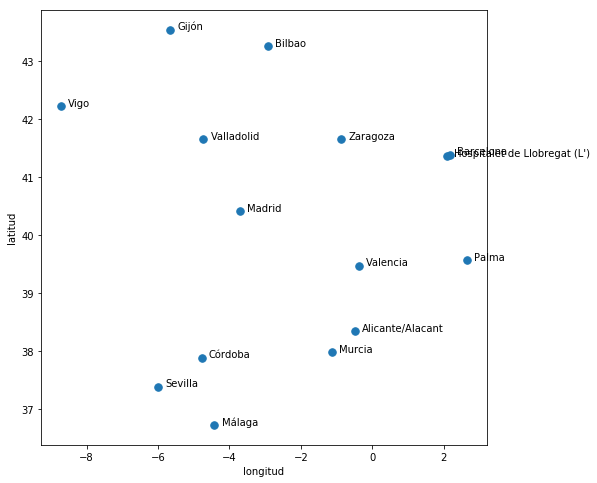

In [31]:
plt.figure(figsize=(8,8))
plt.plot(x,y,'.',markerSize=15)
for k in range(len(pob)):
    plt.text(x[k]+0.2,y[k],pob[k],fontsize=10)
plt.xlabel('longitud'); plt.ylabel('latitud');

Ten en cuenta que las coordenadas esféricas representadas en un plano producen una deformación.

### Ciudades más alejadas

¿Cuál es la pareja de ciudades españolas  más alejadas entre sí, dentro de la península? (Podemos considerar solo las más grandes, con más de 10K habitantes por ejemplo.)

Para resolver este problema necesitamos dos cosas:

- una función que convierta posiciones GPS en puntos sobre la superficie terrestre (suponemos una esfera y altitud común) para calcular la distancia correctamente.


- hacer un bucle doble para calcular las distancias entre todas las parejas de ciudades. 

In [32]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_excel('https://robot.inf.um.es/material/data/listado-longitud-latitud-municipios-espana.xls',skiprows=2)

En primer lugar vamos a crear una función auxiliar para extraer las coordenadas gps de una ciudad dada.

In [34]:
df[df.Población=='Toledo']

,Comunidad,Provincia,Población,Latitud,Longitud,Altitud,Habitantes,Hombres,Mujeres
2651,Castilla La Mancha,Toledo,Toledo,39.85678,-4.024476,524.0618,82291,39497,42794


In [35]:
df[df.Población=='Toledo'][['Latitud','Longitud']].iloc[0]

Latitud     39.856780
Longitud    -4.024476
Name: 2651, dtype: float64

Viendo cómo funciona la selección de filas y columnas y tras unas cuantas pruebas, elegimos esa definición:

In [36]:
def gps(ciudad):
    return np.array(df[df.Población==ciudad][['Latitud','Longitud']].iloc[0])

gps('Toledo')

array([39.85678 , -4.024476])

Para calcular la distancia entre dos puntos gps convertimos las coordenadas esféricas a vectores 3D cartesianos y luego vemos el ángulo que forman.

In [37]:
def tovec(p):
    la,lo = np.radians(p)
    z = np.sin(la)
    x = np.cos(la) * np.cos(lo)
    y = np.cos(la) * np.sin(lo)
    return np.array([x,y,z])

RT = 6371

def geodist(p,q):
    v1 = tovec(p)
    v2 = tovec(q)
    x = v1 @ v2
    if abs(x) > 1:
        return 0
    a = np.arccos(x)
    return RT*a


geodist(gps('Murcia'),gps('Cartagena'))

43.737900891002596

Ya estamos en condiciones de encontrar al máxima distancia. Primero "filtramos" las ciudades, quitando las que están fuera de la península o son pequeñas.

In [38]:
# OJO, hay errores en la hoja excel en las coordenadas gps de algún pueblo pequeño.
sel = df[  (df.Comunidad !='Canarias') 
         & (df.Comunidad != 'Islas Baleares') 
         & (df.Comunidad != 'Ceuta y Melilla') 
         & (df.Habitantes>10000)]

n = len(sel)
print(n)
pob = sel.Población.values
x   = sel.Latitud.values
y   = sel.Longitud.values
r = np.array([x,y]).T
r[:3]

684


array([[36.74807 , -3.022522],
       [37.38979 , -2.147483],
       [36.84016 , -2.467922]])

Hemos juntado x e y en una matriz r, de modo que r[k] nos da las coordenadas gps de la ciudad k-esima.

Creamos una lista de tuplas con todos los pares de ciudades y sus distancias.

In [39]:
dists = [ (geodist(r[k], r[j]), pob[k], pob[j])
            for k in range(n)
            for j in range(n)
            if k>j ]

In [40]:
dists[:5]

[(105.4462703406395, 'Albox', 'Adra'),
 (50.43425380598539, 'Almería', 'Adra'),
 (67.39783913300305, 'Almería', 'Albox'),
 (12.728193898018514, 'Berja', 'Adra'),
 (93.30649073678539, 'Berja', 'Albox')]

Y finalmente ordenamos la lista de tuplas. La ordenación de objetos que no son simples números se hace atendiendo a su primer elemento.

In [41]:
sorted(dists,reverse=True)[:10]

[(1063.7784881044513, 'Roses', 'Ayamonte'),
 (1058.6389686120383, 'Roses', 'Isla Cristina'),
 (1056.2678337034565, "Castelló d'Empúries", 'Ayamonte'),
 (1053.4739176577102, "Escala (L')", 'Ayamonte'),
 (1051.1472929342162, "Castelló d'Empúries", 'Isla Cristina'),
 (1048.839814805908, 'Torroella de Montgrí', 'Ayamonte'),
 (1048.5680696126924, 'Figueres', 'Ayamonte'),
 (1048.2701786306231, "Escala (L')", 'Isla Cristina'),
 (1046.3052897444443, 'Roses', 'Lepe'),
 (1045.2583114569381, 'Palafrugell', 'Ayamonte')]

Podemos resolver el mismo problema con otra selección de ciudades:

In [42]:
sel = df[(df.Comunidad =='Murcia')]

n = len(sel)
print(n)
pob = sel.Población.values
x   = sel.Latitud.values
y   = sel.Longitud.values
r = np.array([x,y]).T

dists = [ (geodist(r[k], r[j]), pob[k], pob[j])
            for k in range(n)
            for j in range(n)
            if k>j ]

45


In [43]:
sorted(dists,reverse=True)[:10]

[(140.6840195901029, 'Yecla', 'Águilas'),
 (131.83296399495487, 'Yecla', 'Puerto Lumbreras'),
 (121.36388557483944, 'Jumilla', 'Águilas'),
 (116.60211355172983, 'Yecla', 'Lorca'),
 (114.28222686856702, 'Yecla', 'Mazarrón'),
 (112.9612866825677, 'Yecla', 'Unión (La)'),
 (112.80740153268972, 'Yecla', 'Cartagena'),
 (110.23582636524266, 'Puerto Lumbreras', 'Jumilla'),
 (108.96018538694616, 'Unión (La)', 'Moratalla'),
 (103.90268003566823, 'San Pedro del Pinatar', 'Moratalla')]

Nota: es posible calcular una matriz de distancias entre parejas de puntos usando `numpy`, lo que es mucho más eficiente que el bucle doble explícito de Python. Pero no merece la pena complicar el ejercicio.

### Zipf's law

Aprovechando que tenemos el número de habitantes de las ciudades vamos a mostrar su histograma:

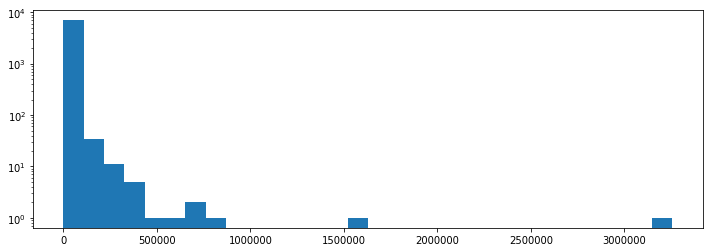

In [44]:
plt.figure(figsize=(12,4))
plt.hist(df[(df.Habitantes>100)].Habitantes,log=True,bins=30);

Tiene una forma muy característica, completamente distinta de las distribuciones normales (con forma de campana) que se observan en otro tipo de procesos aleatorios. El histograma en escala logarítmica parece que se comporta mejor:

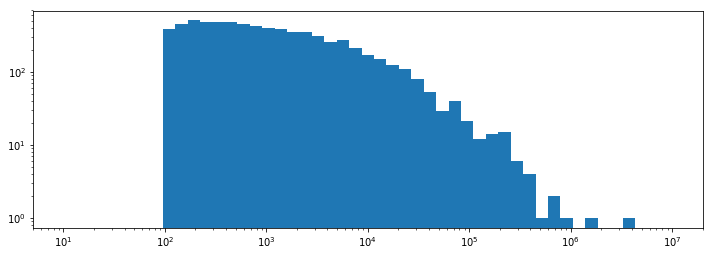

In [45]:
plt.figure(figsize=(12,4))
plt.hist(df[(df.Habitantes>100)].Habitantes,log=True,bins=np.logspace(1, 7, 50));plt.xscale('log');

Pero lo que realmente es indicativo es la distribución acumulada empírica:

(-1000, 10000)

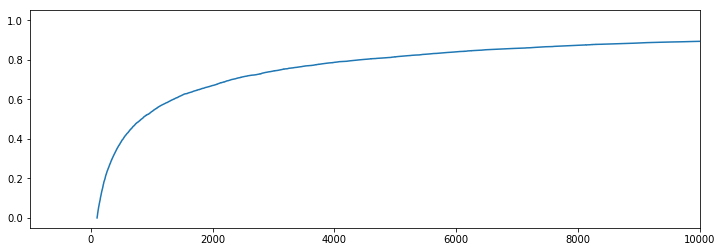

In [46]:
plt.figure(figsize=(12,4))
x = sorted(np.array(df[df.Habitantes>100].Habitantes))
k = np.arange(len(x))/len(x)
plt.plot(x,k); plt.xlim(-1000,10000)

Tiene toda la pinta de ser una distribución "scale free" o  "[power law](https://en.wikipedia.org/wiki/Power_law)". Si mostramos en escalas logarítmicas el tamaño de cada ciudad frente a su número de orden obtenemos una dependencia esencialmente lineal, cuya pendiente es el parámetro característico de la distribución.

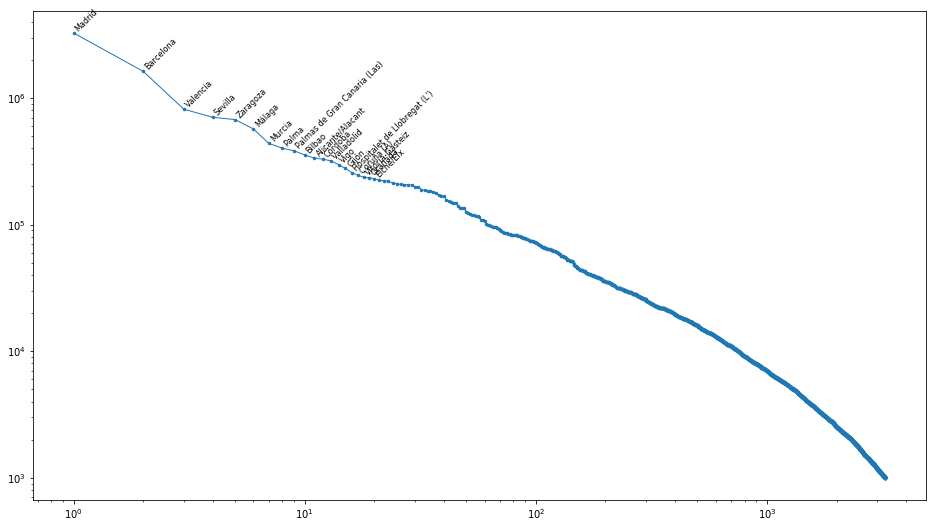

In [47]:
dfs = df[df.Habitantes>1000].sort_values('Habitantes',ascending=False)

names = list(dfs.Población)
x = list(dfs.Habitantes)
plt.figure(figsize=(16,9))
plt.plot(1+np.arange(len(x)), x ,'.-',lw=1,markerSize=5);
for k in range(20):
    plt.text(1+k,x[k],names[k],rotation=45,horizontalalignment='left',verticalalignment='bottom',fontsize=8)
plt.xscale('log'); plt.yscale('log');

Lo mismo ocurre en un subconjunto (al menos en un cierto rango de tamaños).

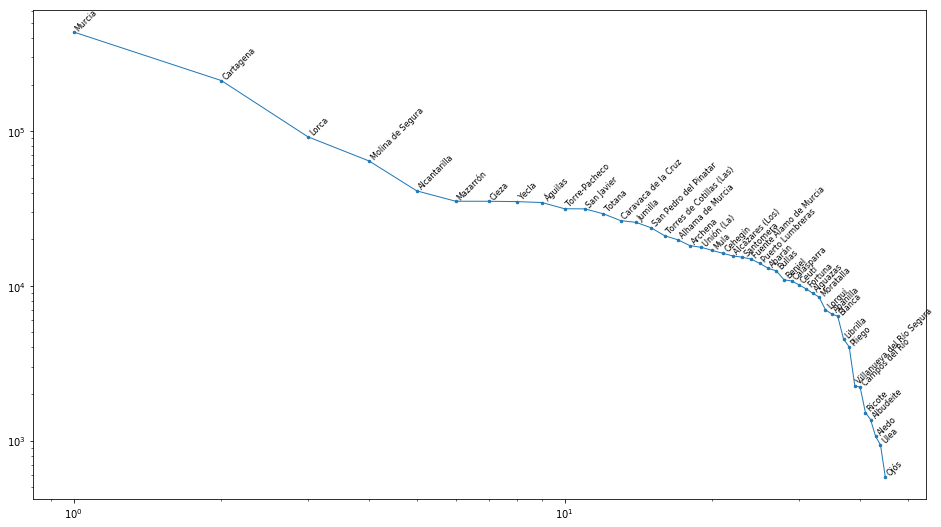

In [48]:
dfs = df[df.Comunidad=='Murcia'].sort_values('Habitantes',ascending=False)

names = list(dfs.Población)
x = list(dfs.Habitantes)
plt.figure(figsize=(16,9))
plt.plot(1+np.arange(len(x)), x ,'.-',lw=1,markerSize=5);
for k in range(len(x)):
    plt.text(1+k,x[k],names[k],rotation=45,horizontalalignment='left',verticalalignment='bottom',fontsize=8)
plt.xscale('log'); plt.yscale('log');

Este tipo de distribución se observa en muchos otros fenómenos. Por ejemplo, en la frecuencia de las palabras de un idioma:

In [49]:
#https://en.wiktionary.org/wiki/User:Matthias_Buchmeier/Spanish_frequency_list-1-5000

# !wget http://robot.inf.um.es/material/data/palabras.txt

In [50]:
data = open('palabras.txt').read().split(' ')
freqs = np.array(data[0::2]).astype(float)
words = data[1::2]

ks = np.arange(1,1+len(freqs))

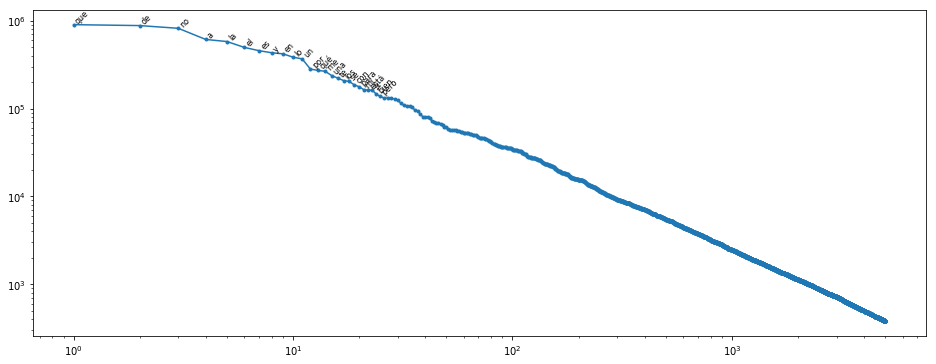

In [51]:
plt.figure(figsize=(16,6))
plt.plot(ks,freqs,'.-');
for k in range(25):
    plt.text(1+k,freqs[k],words[k],rotation=45,horizontalalignment='left',verticalalignment='bottom',fontsize=8)
plt.xscale('log'); plt.yscale('log');